# Frank mixtureモデルの最尤推定

In [2]:
#!mkdir model

In [3]:
from MIC import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp

# データのロード

### リアルデータ

In [279]:
#Load dataset
df = dataloader.load_data_template("trading_jp", start=(2010,1,1),end=(2020,12,31),log_return=True) #currently only support 5 major Japanese trading firms.
df = df.iloc[:,[0,1]] #choose 2 columns.

#Calculate statistics
tau,rho,_,_,_,_= stats.calc_bivar_stats(df)

u=0.05,Threshold: -0.024467936530411016,-0.02729747495029322
λL: 0.6
u=0.01,Threshold: -0.04276695113652451,-0.04886452407856279
λL: 0.6
u=0.05,Threshold: 0.024768513388756297,0.026536754061502243
λU: 0.485
u=0.01,Threshold: 0.040749817674867295,0.04422313120957799
λU: 0.475


In [280]:
tau

SignificanceResult(statistic=0.5767910595606367, pvalue=0.0)

In [281]:
print(len(df))
df.head()

4017


,ITOCHU,Marubeni
2010-01-01,0.024194,0.026257
2010-01-02,0.024194,0.026257
2010-01-03,0.024194,0.026257
2010-01-04,0.024194,0.026257
2010-01-05,0.016727,-0.001816


<Axes: >

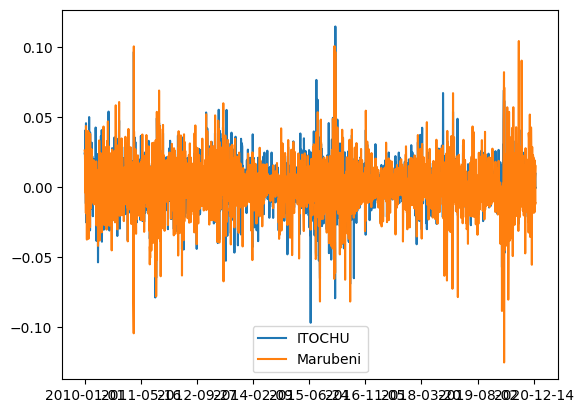

In [282]:
df.plot()

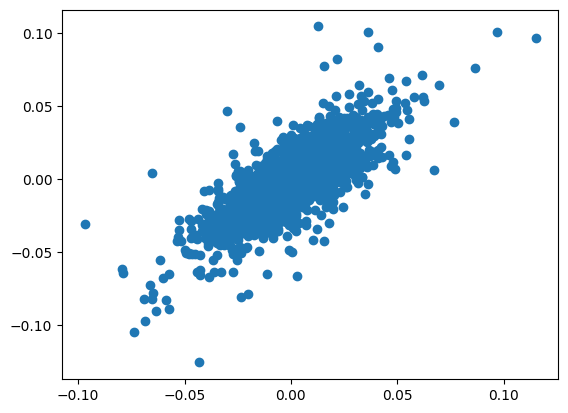

In [283]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

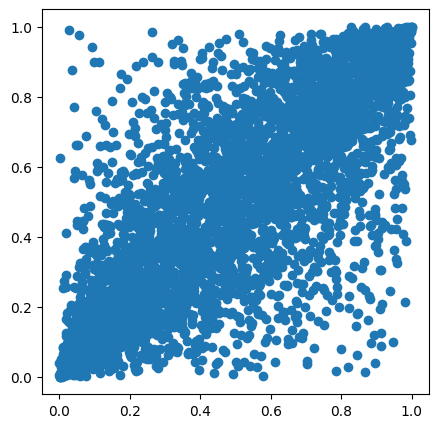

In [284]:
df, _ = dataloader.preprocessing(df)
plt.figure(figsize=(5,5))
plt.scatter(df.iloc[:,0],df.iloc[:,1])

### SP, NIKKEI,Dow-Jones

In [245]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)
eq = web.DataReader('SP500', 'fred', start, end)
dwj = web.DataReader('DJIA','fred', start, end)
nikkei = web.DataReader('NIKKEI225','fred', start, end)
vix = web.DataReader('VIXCLS','fred', start, end)
df = pd.DataFrame(index = eq.index)
#df['SP500'] = eq
#df['DowJones'] = dwj
#df['NIKKEI225'] = nikkei
df['SP500'] = dataloader.log_return(eq,0)
#df['DowJones'] = dataloader.log_return(dwj,0)
df['NIKKEI225'] = dataloader.log_return(nikkei,0)
#df['VIX'] = vix
df.dropna(inplace = True)

### Frankデータ

In [201]:
df = sampler.Invsamples_frank(theta=10,size=3000)
df = pd.DataFrame(df,columns=["X","Y"])

In [202]:
#Calculate statistics
tau,rho,_,_,_,_= stats.calc_bivar_stats(df)
tau

u=0.05,Threshold: 0.05055454950882976,0.04355647135496021
λL: 0.31333333333333335
u=0.01,Threshold: 0.01134179717755246,0.009247085541119105
λL: 0.1
u=0.05,Threshold: 0.9508180840953004,0.9404442847961508
λU: 0.36
u=0.01,Threshold: 0.9945518657384688,0.9879693508762347
λU: 0.06666666666666667


SignificanceResult(statistic=0.6636461042569745, pvalue=0.0)

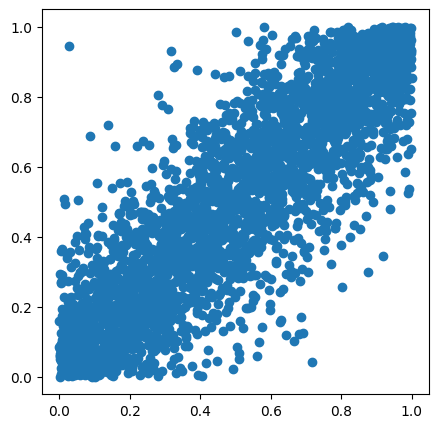

In [203]:
df, _ = dataloader.preprocessing(df)
plt.figure(figsize=(5,5))
plt.scatter(df.iloc[:,0],df.iloc[:,1])

### 前処理と可視化

In [285]:
df_os, _ = dataloader.preprocessing(df)

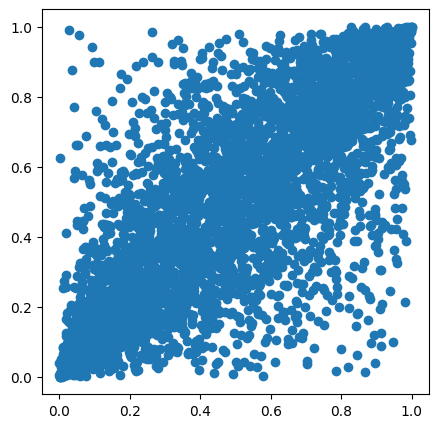

In [286]:
plt.figure(figsize=(5,5))
plt.scatter(df_os.iloc[:,0],df_os.iloc[:,1])

In [287]:
#Calculate statistics
tau,rho,_,_,_,_= stats.calc_bivar_stats(df)
tau

u=0.05,Threshold: 0.049776007964161276,0.049776007964161276
λL: 0.6
u=0.01,Threshold: 0.009955201592832254,0.009955201592832254
λL: 0.6
u=0.05,Threshold: 0.9502239920358387,0.9502239920358387
λU: 0.485
u=0.01,Threshold: 0.9900447984071677,0.9900447984071677
λU: 0.475


SignificanceResult(statistic=0.5766364464968108, pvalue=0.0)

In [288]:
#正解
n_ = 30
df_os_copy = df_os.copy()
df_os_copy.columns = ["X","Y"]
keiken_copula = np.zeros((n_,n_))
for i in range(n_):
    for j in range(n_):
        x_thresh = (i+1)/30
        y_thresh = (j+1)/30
        keiken_copula[i][j] = len(df_os_copy.query("(@i)/30 < X < (@i+1)/30 and (@j)/30 < Y < (@j+1)/30"))
keiken_copula = keiken_copula/len(df_os)

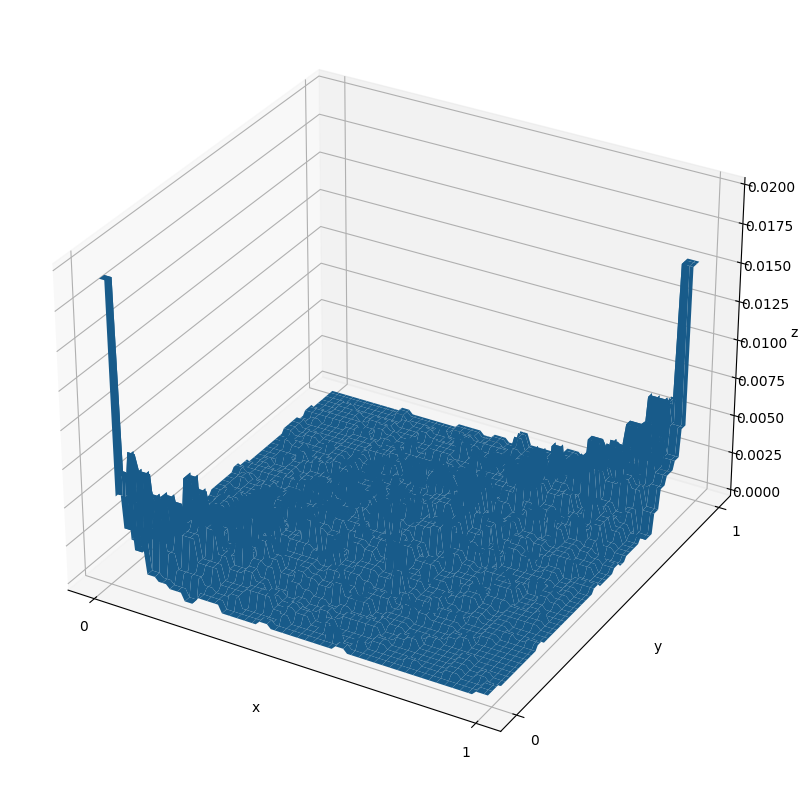

In [289]:
_ = visualize.three_dim_plot_flatten(keiken_copula, top=0.02)

## 分布の作成
τとinvの関係  
τ = 0.67, inv = 5.1  
τ = 0.66, inv = 5.0  
τ = 0.57, inv = 3.61  
τ = 0.11, inv = 0.55  

## power_ccopula

In [209]:
#need to convert tau into pseudo log odds ratio
#mick = copula.greedy_MICK(size=30,invariance=3.61) #τ=0.57の場合
#mick = copula.greedy_MICK(size=30,invariance=0.55) #τ=0.11の場合
#mick = copula.greedy_MICK(size=30,invariance=5.0) #τ=0.67の場合

In [210]:
#しっぱい
# def power_ccopula(cop,k):
#     cop = cop ** k
#     cop = cop / cop.sum()
#     #for _ in range(100):
#     while True:
#         # print(cop.sum(axis=0))
#         # print(cop.sum(axis=1))
#         cop = cop/cop.sum(axis=0)
#         # print(cop.sum(axis=0))
#         # print(cop.sum(axis=1))
#         cop = cop.T
#         # print(cop.sum(axis=0))
#         # print(cop.sum(axis=1))
#         cop = cop/cop.sum(axis=0)
#         # print(cop.sum(axis=0))
#         # print(cop.sum(axis=1))
#         if np.all(abs(cop.sum(axis=0)-1)<1e-10) and np.all(abs(cop.sum(axis=1)-1)<1e-10):
#             break
#     return cop

In [211]:
def power_ccopula(cop,k):
    dist = cop**k
    dist = dist/dist.sum()
    n = len(cop)
    fx = dist.sum(axis=0)
    fy = dist.sum(axis=1)
    Fx = []
    tmp = 0
    for i in range(n):
        tmp += fx[i]
        Fx.append(tmp)
    Fy = []
    tmp = 0
    for i in range(n):
        tmp += fy[i]
        Fy.append(tmp)

    
    print(dist)


    def Finv_x(u):
        ind = 0
        while Fx[ind] < u:
            ind += 1
        r = (u-Fx[ind-1])/(Fx[ind]-Fx[ind-1])
        return (1/n)*(ind)

    def Finv_y(u):
        ind = 0
        while Fy[ind] < u:
            ind += 1
        r = (u-Fy[ind-1])/(Fy[ind]-Fy[ind-1])
        return (1/n)*(ind)
    
    res = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            i_ = int(Finv_x((i+0.5)/n)/(1/n))
            j_ = int(Finv_y((j+0.5)/n)/(1/n))
            res[i][j] = dist[i_][j_]/(fx[i_]*fy[j_])*(1/(n**2))
    
    np.save(f"Frankをk乗したmodel/mick-power-{k}", res)
    return res

In [212]:
for k in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]:
    res = power_ccopula(mick,k)

[[0.00150882 0.00147023 0.00143015 0.00138921 0.00134798 0.00130688
  0.00126624 0.00122629 0.00118721 0.00114909 0.001112   0.00107598
  0.00104103 0.00100717 0.00097437 0.00094262 0.00091189 0.00088217
  0.00085342 0.0008256  0.0007987  0.00077269 0.00074752 0.00072317
  0.00069962 0.00067682 0.00065475 0.00063337 0.00061265 0.00059257]
 [0.00147023 0.00145211 0.00142807 0.00139928 0.0013669  0.00133202
  0.00129556 0.00125827 0.00122071 0.00118332 0.0011464  0.00111015
  0.00107472 0.00104019 0.00100661 0.00097402 0.00094241 0.00091179
  0.00088214 0.00085343 0.00082566 0.00079878 0.00077277 0.00074761
  0.00072326 0.00069969 0.00067688 0.00065478 0.00063336 0.0006126 ]
 [0.00143014 0.00142807 0.00141847 0.00140195 0.00137947 0.00135218
  0.00132127 0.00128781 0.00125275 0.00121682 0.00118059 0.00114451
  0.00110885 0.00107383 0.0010396  0.00100623 0.00097379 0.00094228
  0.00091173 0.00088213 0.00085346 0.0008257  0.00079883 0.00077283
  0.00074766 0.0007233  0.00069971 0.00067686 

In [213]:
#_ =  visualize.three_dim_plot_flatten(power_ccopula(mick,5), top=0.02)

In [214]:
res.sum(axis=0)

array([0.03291089, 0.03291089, 0.03291089, 0.03291089, 0.03291089,
       0.03291089, 0.03291089, 0.03291089, 0.03279109, 0.03279109,
       0.03279109, 0.03331147, 0.03516735, 0.03780493, 0.05245666,
       0.05244223, 0.03777836, 0.03514135, 0.03328573, 0.03276641,
       0.03276641, 0.03276641, 0.03288787, 0.03288787, 0.03288787,
       0.03288787, 0.03288787, 0.03288787, 0.03288787, 0.03288787])

#### power-1がL1, L2で測ると最も良いが, 尤度で見るとなぜかpowerが大きいほど良い...

In [215]:
#単純に差を見る.（L1norm)
print(np.sum(np.abs(keiken_copula - np.load("Frankをk乗したmodel/mick-power-0.5.npy"))))
print(np.sum(np.abs(keiken_copula - np.load("Frankをk乗したmodel/mick-power-1.npy"))))
print(np.sum(np.abs(keiken_copula - np.load("Frankをk乗したmodel/mick-power-2.npy"))))
#単純に差を見る.（21norm)
#np.sum(np.abs(keiken_copula - np.load("Frankをk乗したmodel/mick-power-1.npy"))**2)

0.4861695334779995
0.31882180907739055
0.498757207891924


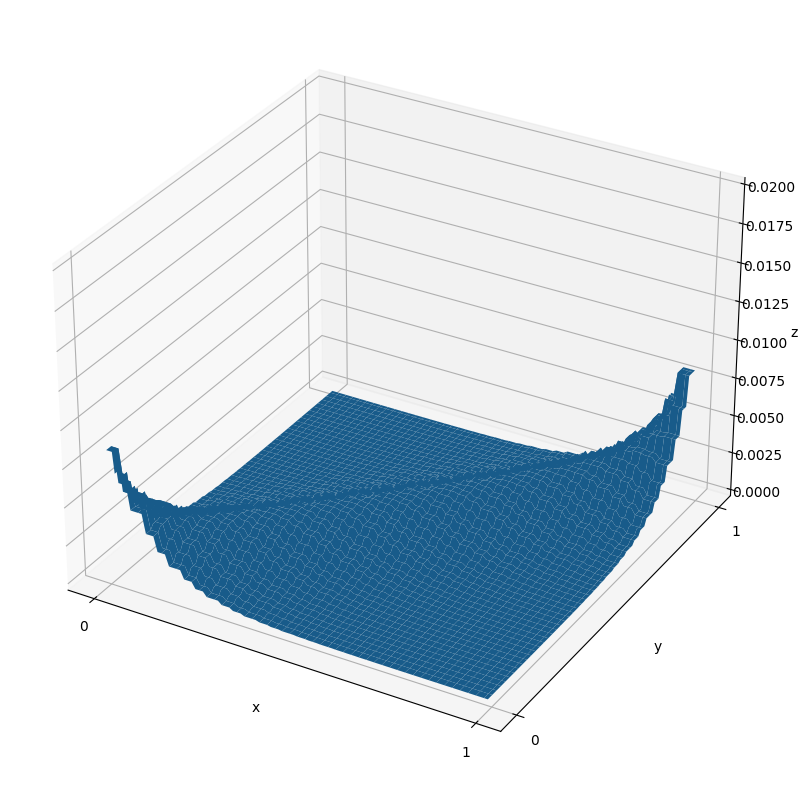

In [216]:
_ =  visualize.three_dim_plot_flatten(np.load("Frankをk乗したmodel/mick-power-1.npy"), top=0.02)

## greedyのkに拡張

In [290]:
def solve_movement_k(theta,x1,x2,x3,x4,k):
   a = 1-exp(theta*((x1+x2+x3+x4)**k))
   b = x1+x4+(x2+x3)*exp(theta*((x1+x2+x3+x4)**k))
   c = x1*x4 - x2*x3*exp(theta*((x1+x2+x3+x4)**k))
   solution = utils.solv_quadratic_equation(a,b,c)
   return solution

def greedy_k(size,invariance,k):
   n = size
   opt = utils.create_uniform((n,n))

   while True: 
      max_delta = 0
      for i in range(n-1):
            for j in range(n-1):
               delta = solve_movement_k(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1],k)
               opt[i][j] += delta
               opt[i+1][j+1] += delta
               opt[i+1][j] -= delta
               opt[i][j+1] -= delta
               if delta > max_delta:
                  max_delta = delta
      if abs(max_delta) < 1e-7:
            break
   return opt

In [291]:
for k in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]:
    res = greedy_k(30,3.61,k)
    np.save(f"greedyをkに変更したmodel/mick-power-{k}", res)

## MICKとMICSのmixture

In [889]:
tau = 0.80
inv = 9.5
mick = copula.greedy_MICK(30,inv)
np.save(f"model/mick-inv{inv}-tau{tau}", mick)

In [890]:
inv = 0.15
mics = copula.greedy_MICS(30,inv)
np.save(f"model/mics-inv{inv}-tau{tau}", mics)

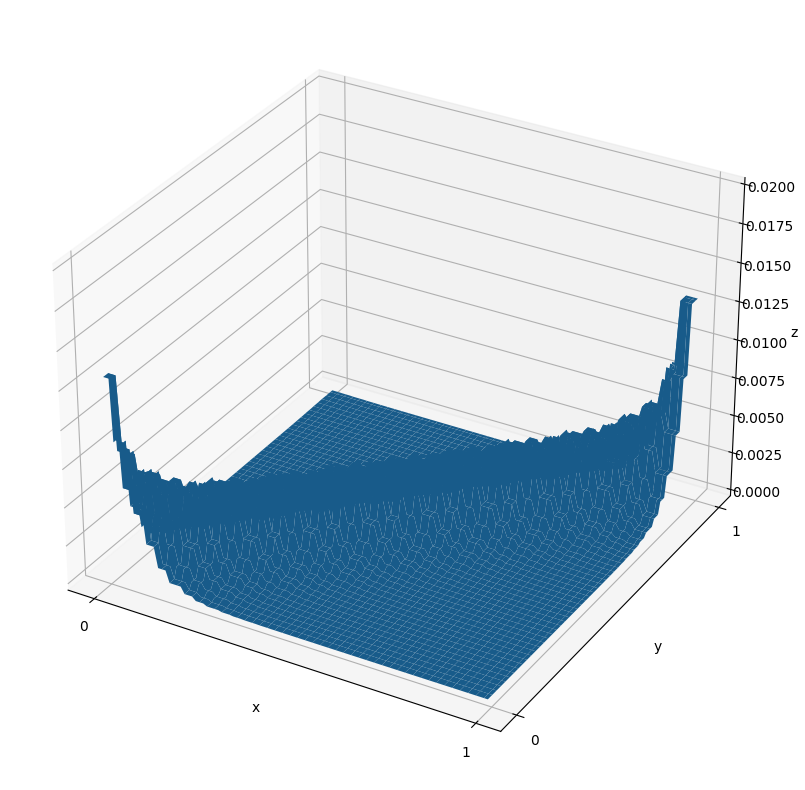

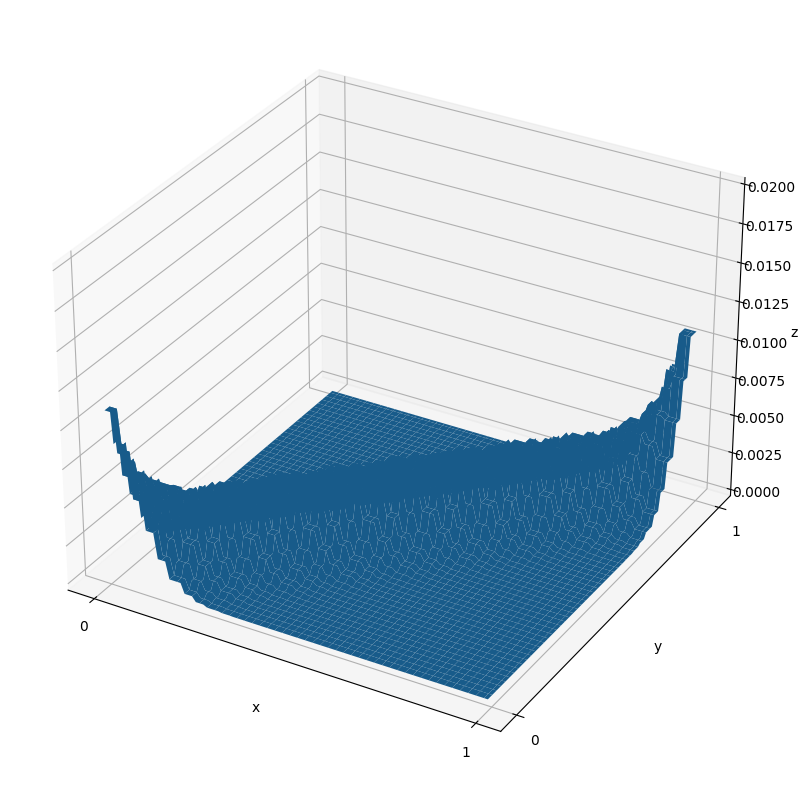

In [892]:
###ほぼ同じ値
_ = visualize.three_dim_plot_flatten(mick, top=0.02)
_ = visualize.three_dim_plot_flatten(mics, top=0.02)

# 混合分布を用いたfitting

とりあえず３種類  
（参考）https://arxiv.org/pdf/1906.09388.pdf

In [292]:
import numpy as np
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
from pyomo.environ import *

In [293]:
model = pyo.ConcreteModel()

In [294]:
# 変数の添字
I = 5
model.I = pyo.Set(initialize=range(1, I+1))
# 変数の定義
model.x = pyo.Var(model.I, domain=pyo.NonNegativeReals)

In [295]:
for i in range(1,I+1):
    model.x[i].value = 1/I
#model.x[1].value = 0.7
#model.x[2].value =0.3

In [296]:
### Frankをk乗したmodel
#distributions = [np.load("Frankをk乗したmodel/mick-power-0.3.npy"),np.load("Frankをk乗したmodel/mick-power-0.5.npy"),np.load("Frankをk乗したmodel/mick-power-1.npy"),np.load("Frankをk乗したmodel/mick-power-2.npy"),np.load("Frankをk乗したmodel/mick-power-3.npy")]
distributions = [np.load("greedyをkに変更したmodel/mick-power-0.3.npy"),np.load("greedyをkに変更したmodel/mick-power-0.5.npy"),np.load("greedyをkに変更したmodel/mick-power-1.npy"),np.load("greedyをkに変更したmodel/mick-power-2.npy"),np.load("greedyをkに変更したmodel/mick-power-3.npy")]
print(len(distributions))

### MICKとMICSのmixture
#distributions = [np.load("model/mick-inv0.55-tau0.11.npy"),np.load("model/mics-inv0.0024-tau0.11.npy")]
#distributions = [np.load("model/mick-inv9.5-tau0.8.npy"),np.load("model/mics-inv0.15-tau0.8.npy")]

5


In [297]:
data = df.values
data.shape

(4017, 2)

対数尤度  
$$l = -\sum_i \log{ p(X_i)}$$

In [298]:
def likelihood(sample, ccop):
    x = sample[0]
    y = sample[1]
    n = len(ccop)
    i = int(x/(1/n))
    j = int(y/(1/n))
    return ccop[i][j]/(1/(n**2))

In [299]:
# 目的関数の数式の定義
def ObjRule(model):
    res = 0
    for ind in range(len(data)):
        res = res + log(sum([(model.x[i])*likelihood(data[ind],distributions[i-1]) for i in model.I]))
    #res = sum([(model.x[i])*likelihood(data[0],distributions[i-1]) for i in model.I])
    return -res
# 目的関数として設定
model.obj = pyo.Objective(rule = ObjRule, sense = pyo.minimize)

In [300]:
# 制約1
def Construle1(model):
    return sum([model.x[i] for i in range(1,I+1)]) == 1
model.eq1 = pyo.Constraint(rule = Construle1)

# def Construle2(model):
#     return model.x[1]>= 0
# model.eq2 = pyo.Constraint(rule = Construle2)

# def Construle3(model):
#     return model.x[2]>= 0
# model.eq3 = pyo.Constraint(rule = Construle3)

# def Construle4(model):
#     return model.x[3]>= 0
# model.eq4 = pyo.Constraint(rule = Construle4)

In [301]:
# ソルバーの設定
opt = pyo.SolverFactory('ipopt')
# 最適化の実施
res = opt.solve(model,tee=True)

Ipopt 3.14.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.12, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number

In [302]:
print(res)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 5
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03675508499145508
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [303]:
for k in range(1,I+1):
    print(model.x[k]())

0.009792585679846009
0.10121755786675014
0.8475439960955032
2.7994305835679634e-05
0.04141786605206496


In [304]:
model.obj()

-1802.482529729826